Author: Pragat Wagle

Mini Project Machine Learning With Python

# Import Data

The data was imported using pandas in the form of a data frame


In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [2]:
df = pd.read_csv("model.csv")

In [3]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A22,A23,A24,A25,A26,A27,A28,A29,A30,default
0,10.69,86.10,8920.16,19912.85,30.42,31.72,1.18,145.41,2.236,1.786,...,0.01,0.01,0.01,0.13,0.00,0.00,0.00,0.00,0.00,0
1,28.50,65.19,6564.00,6716.67,32.50,23.40,2.74,91.11,1.000,1.000,...,0.06,0.01,0.00,0.09,285.80,0.00,16.44,1.98,42.26,0
2,24.87,73.79,4285.47,6463.75,40.50,51.53,2.84,93.90,2.400,1.400,...,0.08,0.02,0.02,0.44,494.62,135.41,127.45,46.00,14.92,0
3,13.64,85.82,6887.56,9244.44,49.56,53.44,0.36,171.45,1.875,2.167,...,0.03,0.01,0.00,0.05,1015.19,0.00,210.63,92.58,0.00,0
4,4.50,95.92,8746.50,19987.50,32.75,37.88,0.92,153.25,2.000,1.500,...,0.01,0.00,0.00,0.04,0.00,106.41,79.00,0.00,0.00,0


In [4]:
df_x = df.iloc[:,:-1]
df_y = df.iloc[:, -1]

In [5]:
df_x.shape[1]

30

# Data Cleaning

The data cleaning process consisted of filling all of the 0 values with nan then filling these values with the mean, max, and min. Three different data frames were made for each to run each model on. The expectation was that one of the three approach would peform the best.

### Replace all 0 values to for simplicity 

In [7]:
df_x.replace(0, np.nan, inplace = True)

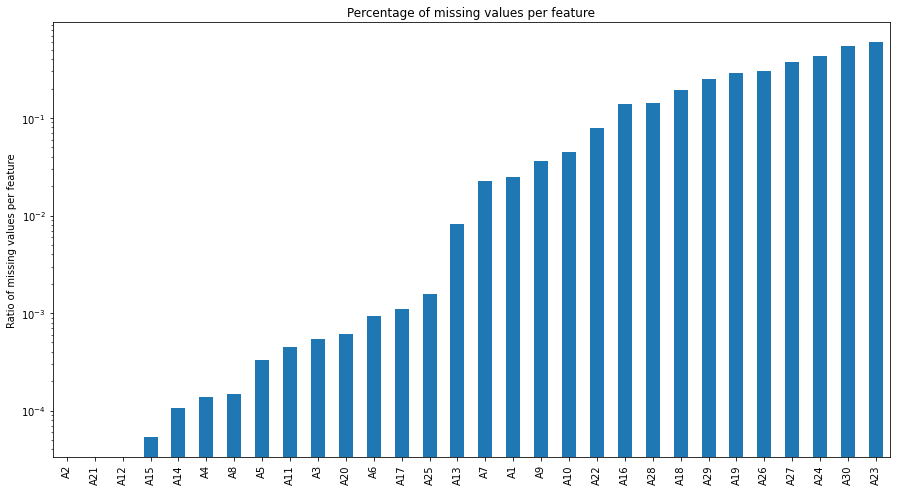

In [10]:
percent_missing(df_x)

In [9]:
df_x.isnull().sum()

A1      2326
A2         0
A3        51
A4        13
A5        31
A6        88
A7      2138
A8        14
A9      3395
A10     4229
A11       42
A12        0
A13      777
A14       10
A15        5
A16    12955
A17      103
A18    18048
A19    27345
A20       58
A21        0
A22     7431
A23    56456
A24    40504
A25      147
A26    28318
A27    35410
A28    13539
A29    23649
A30    51494
dtype: int64

In [11]:
df_max = df_x.fillna(df.max())

In [12]:
df_mean = df_x.fillna(df.mean())

In [13]:
df_min = df_x.fillna(df.min())

# EDA Analysis

Eda analysis consisted of the below functions to create visualizations for the data.

+ **Attr_Type**: This function plots a bar graph which shows the count of type of attribute, i.e. Number, Categorical, Date etc. We are using similar logic in summary statistics where depending upon the type of variable, we derive the numerical and categorical features to further do the processing.


+ **Unique Values**: This function plots the bar chart for the unique value for each attribute. This process will give us some insights about the number of binary , ordinal and continuous (more than 10 unique values) features in the dataset. This info can also be read from info and summary python functions. Another thing to notice here is that y-axis is on log scale. This is because on such a large data set, few elements have more unique values(like CURR ID, SK ID PREV) which makes distribution highly skewed. By taking log, we will have fair idea about other features with lesser unique values.


+ **Numerical_features**:  This function will take only the numerical attributes from a dataframe and produce a dot plot. Each dot in this plot is a sample in our dataset and each subplot represents a different feature. The y-axis shows the feature value, while the x-axis is the sample index. These kind of plots provide a lot of ideas for data cleaning and EDA.   


 + **Num Hist**: This functions takes dataframe and numerical attributes. This will plot histogram for all the features supplied. A very useful visualization to see the data distribution in 1 view. We can take note of attributes which needs transformation, as well as outliers. For a better input data, we should remove the outliers so that it does not influence the target outcome. 

In [14]:
def attr_type(df):
    plt.figure(figsize=(20,20))
    pd.value_counts(df.dtypes).sort_values().plot(kind="bar", figsize=(15, 8),logy=False,
                                              title="Type of features- Numerical/Categorical",
                                              ylabel="Number of features");
    plt.show()

def unique_values(df):
    plt.figure(figsize=(20,20))
    unique_values = df.select_dtypes(include="number").nunique().sort_values(ascending=False)
    unique_values.plot.bar(logy=True, figsize=(15, 4), title="Unique values per feature");
    plt.show()

def percent_missing(df):
    plt.figure(figsize=(20,20))
    df.isna().mean().sort_values().plot(kind="bar", figsize=(15, 8),logy=True,
                                          title="Percentage of missing values per feature",
                                          ylabel="Ratio of missing values per feature");
    plt.show()
    
def numerical_features(df,num_cat):
    plt.figure(figsize=(20,20))
    df[num_cat].plot(lw=0, marker=".", subplots=True, layout=(-1, 4),
              figsize=(15, 12), markersize=1);
    
    plt.show()

def num_hist(df):
    plt.figure(figsize=(20,20))
    df[np.isfinite(df)].hist(bins=25, figsize=(15, 25), layout=(-1, 5), edgecolor="black")
    plt.tight_layout();
    plt.show();

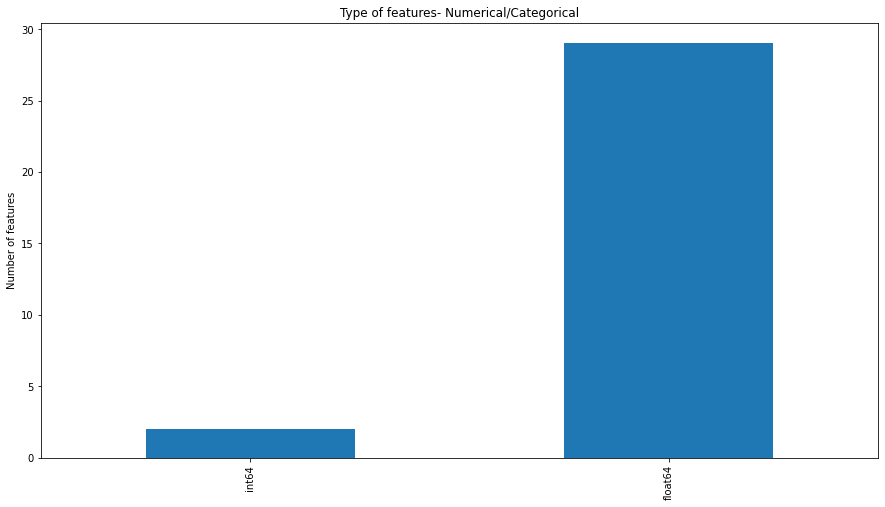

In [15]:
attr_type(df)

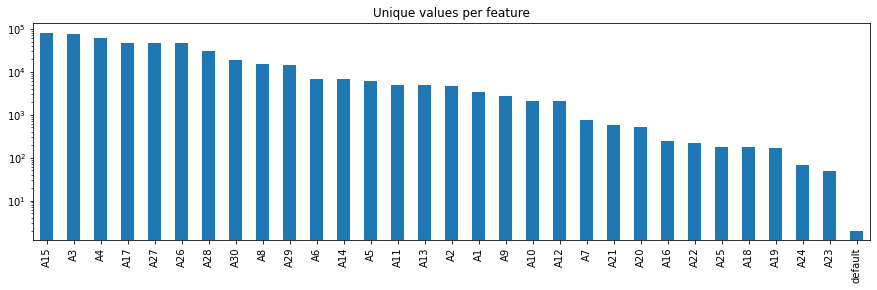

In [32]:
unique_values(df)

<Figure size 1440x1440 with 0 Axes>

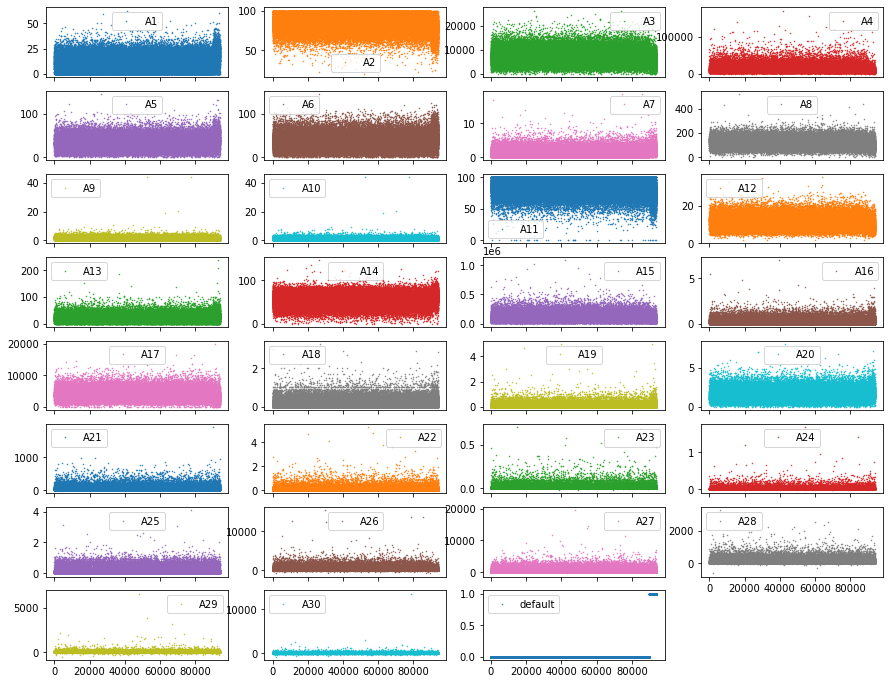

In [33]:
numerical_features(df, df.columns)

<Figure size 1440x1440 with 0 Axes>

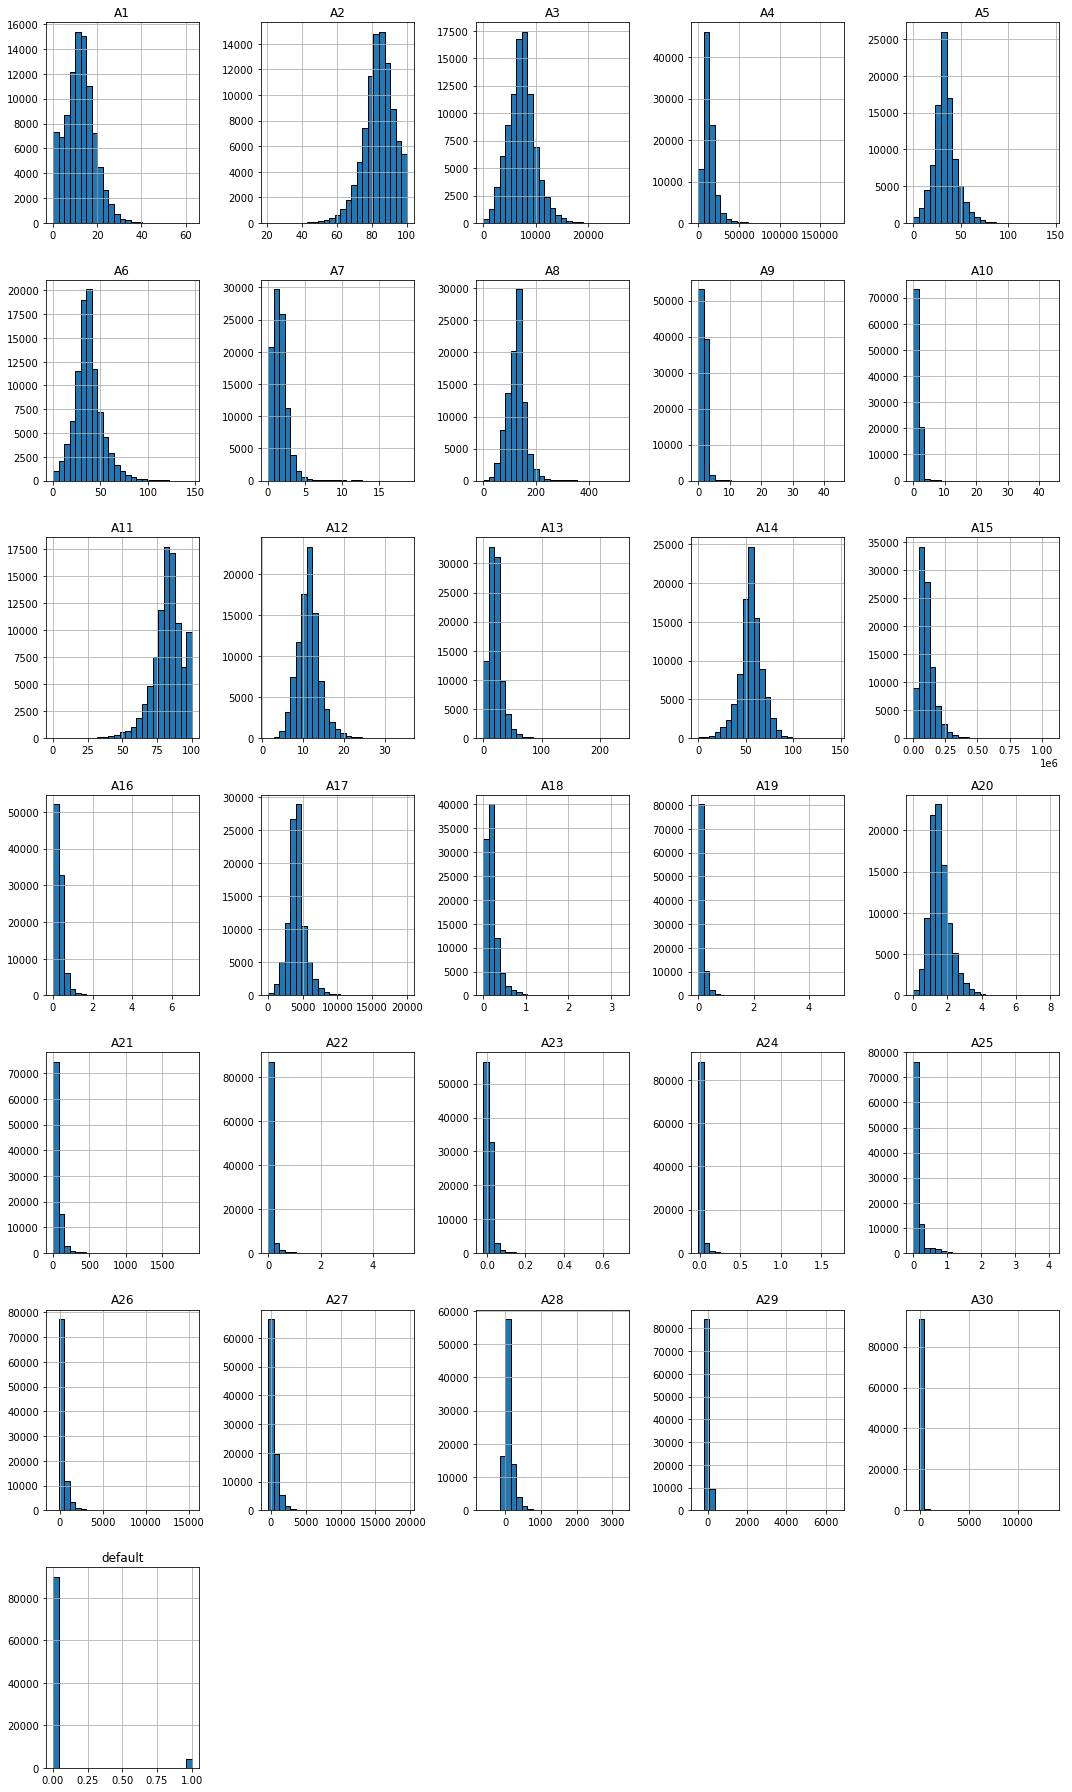

In [35]:
num_hist(df)

### Fix Central Tendency 
In an attempt to centralize the data for columns that do not display a central tendency in the histogram plot above, the data for those specific columns are root transformed and plotted below to show the improved central tendancy. A model was run on this but the effected the accuracy negatively.

In [183]:
df_root = df.copy()
columns_to_root_transform = ['A9','A10','A16','A19','A21','A22','A23','A24','A25','A26','A27','A29','A30']
for col in columns_to_root_transform:
    df_root[col]  = np.sqrt(df_root[col])

<Figure size 1440x1440 with 0 Axes>

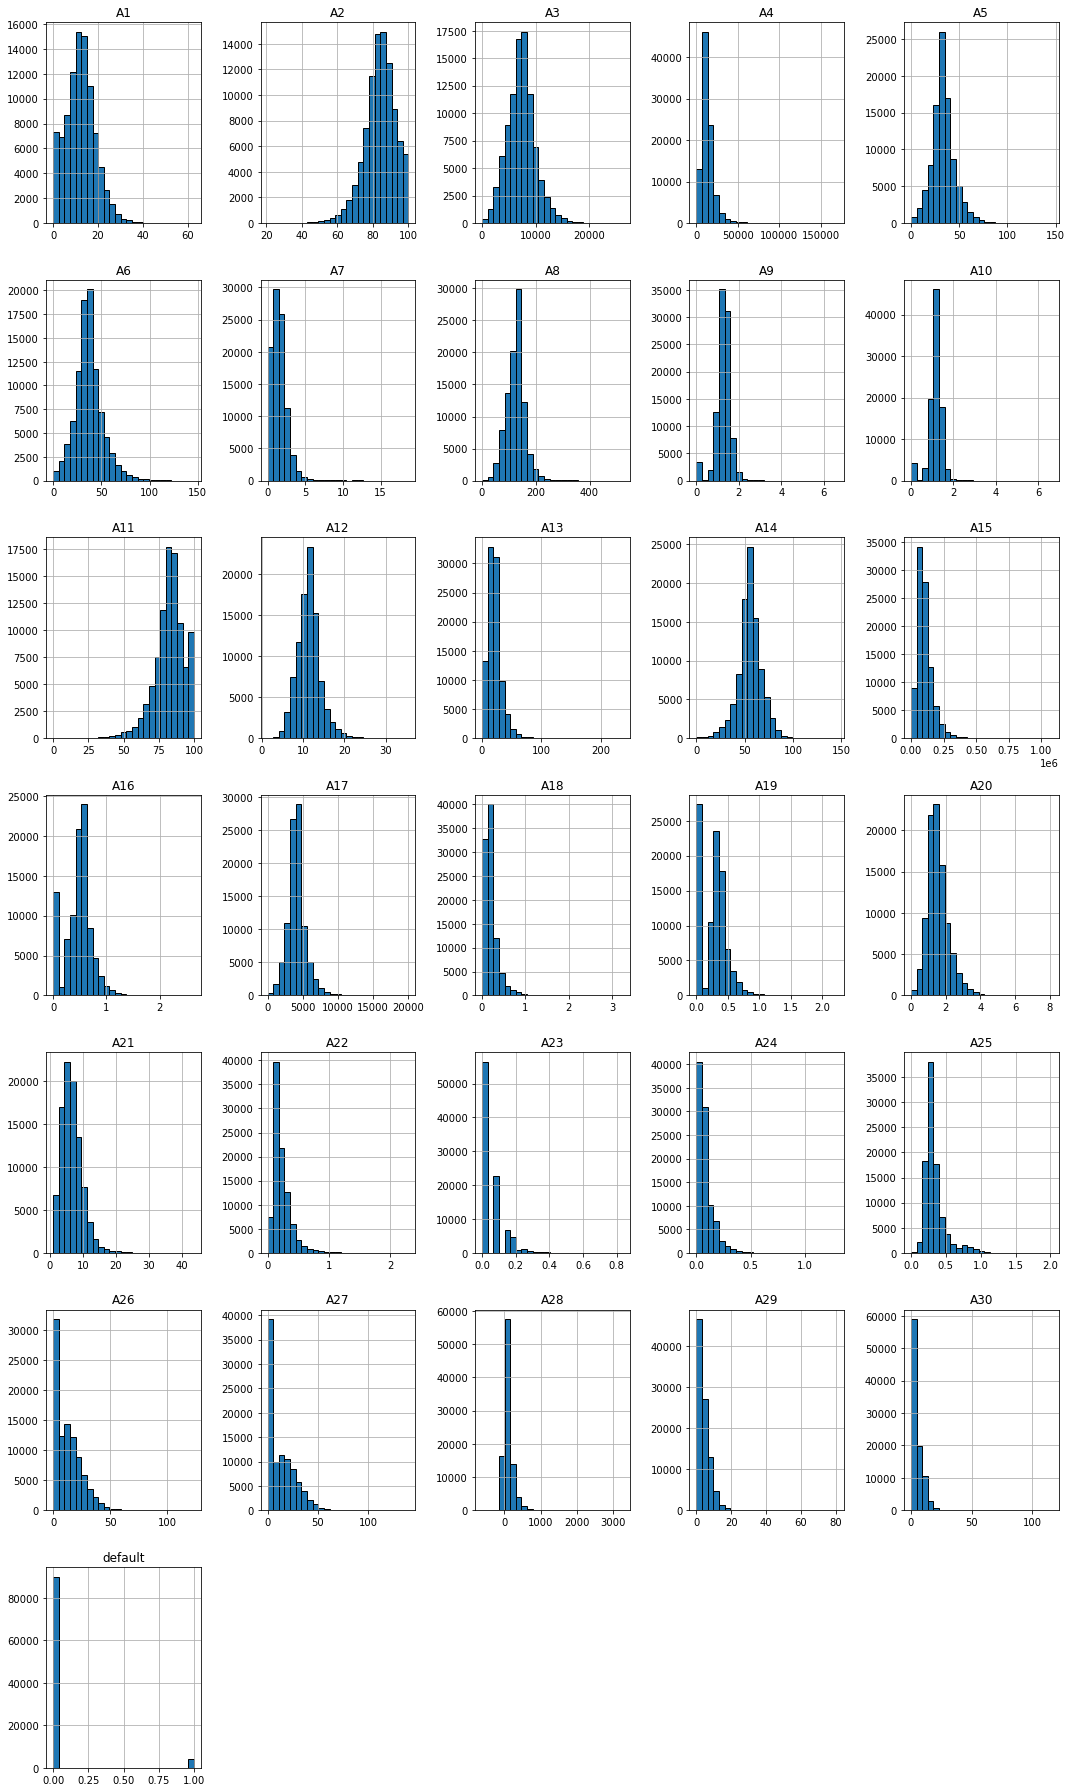

In [184]:
num_hist(df_root)

# Hyperparameter Tuning

In [37]:
# import packages
import os
import time
import warnings
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV

warnings.filterwarnings('ignore')

### Feature extraction based on Type


__Function id_num_cat_feature:__

This function will take a dataframe as input and return 4 lists that contain ID columns, numerical features, categorical features, and numerical features without the ID cols. 

Function name: id_num_cat_feature
Input : Dataframe
Output : 4 Lists

Function output:
1. ID columns
2. Numerical features
3. Categorical features
4. Numerical features excluding the ID columns.

In [38]:
def id_num_cat_feature(df,text = True):
    numerical = df.select_dtypes(include=['int64', 'float64']).columns
    categorical = df.select_dtypes(include=['object', 'bool']).columns
    feat_num = list(numerical)
    feat_cat = list(categorical)
    
    id_cols = ['SK_ID_CURR','SK_ID_BUREAU']
    
    id_cols = [cols for cols in  list(df.columns.intersection(id_cols))] 
    features = list(set(df.columns) - set(id_cols))

    if text == True:
          # print eda
        print('--------')
        print(f"# of ID's: {len(id_cols)}")
        print(f" ID's:")
        print(id_cols)
        print('')
        print('--------')
        print(f"# All features: {len(features)}")
        print(f"All features:")
        print(features)
        print('')
        print(f"Missing data:")
        print(missing_data(df[features]))
        print('')
        print('--------')
        print(f"# of Numerical features: {len(feat_num)}")
        print(f"Numerical features:")
        print(feat_num)
        print('')
        print(f"Numerical Statistical Summary:")
        print('')
        print(df[feat_num].describe())
        print('')
        print('--------')
        print(f"# of Categorical features: {len(feat_cat)}")
        print(f"Categorical features:")
        print(feat_cat)
        print('')
        print(f"Categorical Statistical Summary:")
        print('')
        #print(df[feat_cat].describe(include='all'))
        print('')
        print("Categories:")
        print('')
        print(df[feat_cat].apply(lambda col: col.unique()))
        print('')
        print('--------')
    return id_cols,feat_num,feat_cat,features

In [39]:
id_cols, feat_num, feat_cat, features =  id_num_cat_feature(df_x, text = False)

### Logistic Regression Parameter Tuning

In [45]:
num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler())
])
     
categorical_features =  feat_cat
numerical_features = feat_num

selected_features = (numerical_features) + (categorical_features)

cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])


data_pipeline = ColumnTransformer(transformers=[
        ("num_pipeline", num_pipeline, numerical_features),
        ("cat_pipeline", cat_pipeline, categorical_features)],
        remainder='drop',
        n_jobs=-1
    )


full_pipeline_with_predictor = Pipeline([
        ("preparation", data_pipeline),
        ("logistic_Reg", LogisticRegression())
    ])

C = [100, 10, 1.0, 0.1, 0.01]
solvers = ['saga', 'liblinear']
penalty = [
           'l1', 'l2'
          ]

parameters = dict(logistic_Reg__C=C,
                  logistic_Reg__solver=solvers,
                  logistic_Reg__penalty=penalty
                 )

In [46]:
gd4 = GridSearchCV(full_pipeline_with_predictor, param_grid=params, cv=3, n_jobs=4, scoring='roc_auc')

In [47]:
gd4.fit(df_x, df_y)

/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarn

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preparation',
                                        ColumnTransformer(n_jobs=-1,
                                                          transformers=[('num_pipeline',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['A1',
                                                                          'A2',
                                                                          'A3',
                                                                          'A4',
       

In [48]:
gd4.best_params_

{'logistic_Reg__C': 1.0,
 'logistic_Reg__penalty': 'l1',
 'logistic_Reg__solver': 'liblinear'}

### XGB Boost Hyperparameter Tuning

In [126]:
from xgboost import XGBClassifier

In [127]:
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

In [136]:
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [137]:
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)

In [138]:
grid_search.fit(df_x[:10000], df_y[:10000])

Fitting 10 folds for each of 96 candidates, totalling 960 fits


/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/pragatwagle/opt/

/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/pragatwagle/opt/

/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/pragatwagle/opt/

/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/pragatwagle/opt/

/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/pragatwagle/opt/

/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/pragatwagle/opt/

/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/pragatwagle/opt/

/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/pragatwagle/opt/

/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/pragatwagle/opt/

/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/pragatwagle/opt/

  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 372, in _score
    y_pred = self._select_proba_binary(y_pred, clf.classes_)
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 170, in _select_proba_binary


/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/pragatwagle/opt/

/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/pragatwagle/opt/

/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/pragatwagle/opt/

/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/pragatwagle/opt/

/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/pragatwagle/opt/

/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/pragatwagle/opt/

/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/pragatwagle/opt/

/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/pragatwagle/opt/

/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/pragatwagle/opt/

/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/pragatwagle/opt/

/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/pragatwagle/opt/

/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/pragatwagle/opt/

/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/pragatwagle/opt/

/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/pragatwagle/opt/

/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/pragatwagle/opt/

/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/pragatwagle/opt/

  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 372, in _score
    y_pred = self._

/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/pragatwagle/opt/

/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/pragatwagle/opt/

/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/pragatwagle/opt/

/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/pragatwagle/opt/

/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/pragatwagle/opt/

/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/pragatwagle/opt/

/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/pragatwagle/opt/

/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/pragatwagle/opt/

/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/pragatwagle/opt/

/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/pragatwagle/opt/

/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/pragatwagle/opt/

/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/pragatwagle/opt/

/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/pragatwagle/opt/

/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/pragatwagle/opt/

/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/pragatwagle/opt/

/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/pragatwagle/opt/

/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/pragatwagle/opt/

/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/pragatwagle/opt/

/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/pragatwagle/opt/

/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/pragatwagle/opt/

  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 372, in _score
    y_pred = self._select_proba_binary(y_pred, clf.classes_)
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 170, in _select_proba_binary


/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/pragatwagle/opt/

/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/pragatwagle/opt/

/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/pragatwagle/opt/

/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/pragatwagle/opt/

/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/pragatwagle/opt/

/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/pragatwagle/opt/

/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/pragatwagle/opt/

/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/pragatwagle/opt/

/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/pragatwagle/opt/

/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/pragatwagle/opt/

/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/pragatwagle/opt/

/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/pragatwagle/opt/

/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/pragatwagle/opt/

/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/pragatwagle/opt/

/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/pragatwagle/opt/

/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/pragatwagle/opt/

/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/pragatwagle/opt/

/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/pragatwagle/opt/

/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/pragatwagle/opt/

/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/pragatwagle/opt/

/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/pragatwagle/opt/

/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/pragatwagle/opt/

/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 355, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 68, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'XGBClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/pragatwagle/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/pragatwagle/opt/

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_c...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                  

In [142]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 60}

# Model Training

## Data 

The data that is used throughout the model training process

In [151]:
df_x_max = df_x.fillna(df.max())
df_x_mean = df_x.fillna(df.mean())
df_x_min = df_x.fillna(df.min())
df_y = df.iloc[:, -1]

In [206]:
df_test = pd.read_csv("val.csv")
df_test_x = df_test.iloc[:,:-1]
df_test_y = df_test.iloc[:, -1]

31


## Root Transformed Data 

Some of this data is used to train the model. Only the fill type that results in the highest accuracy were trained again on the respective root transformed data.

In [185]:
df_root_x = df_root.iloc[:, :-1]
df_root_y = df_root.iloc[:, -1]

In [186]:
df_x_root_max = df_root_x.fillna(df_root_x.max())
df_x_root_mean = df_root_x.fillna(df_root_x.mean())
df_x_root_min = df_root_x.fillna(df_root_x.min())

## StandardScaled Data

Only the mean was scaled as results were the same on the untransformed data as the transformed data.

In [196]:
from sklearn.preprocessing import StandardScaler

In [204]:
df_test_x.shape[1]

30

In [208]:
scaler = StandardScaler()
df_scaled_x_mean = scaler.fit_transform(df_x_mean)
df_scaled_y = df_y
df_scaled_test_x = scaler.transform(df_test_x)
df_scaled_test_y = df_test_y

In [153]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

### Logistic Regression

From hyperparameter tuning it was the best parameters for LR was determined to be :
{'logistic_Reg__C': 1.0,
 'logistic_Reg__penalty': 'l1',
 'logistic_Reg__solver': 'liblinear'}

#### The model below is trained on the filling the null values with the max of that column

In [154]:
lr_max = LogisticRegression(penalty = 'l1' , C = 1 , solver = 'liblinear')
lr_max.fit(df_x_max, df_y)

LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [155]:
lr_max.score(df_test_x, df_test_y)

0.8713913043478261

#### The model below is trained on the filling the null values with the mean of that column

In [156]:
lr_mean = LogisticRegression(penalty = 'l1' , C = 1 , solver = 'liblinear')
lr_mean.fit(df_x_mean, df_y)

LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [157]:
lr_mean.score(df_test_x, df_test_y)

0.8719130434782608

#### The model below is trained on the filling the null values with the min of that column

In [158]:
lr_min = LogisticRegression(penalty = 'l1' , C = 1 , solver = 'liblinear')
lr_min.fit(df_x_min, df_y)

LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [159]:
lr_min.score(df_test_x, df_test_y)

0.8719130434782608

### LR on root transformed data

#### The model below is trained on the filling the null values with the mean then root transforming all of the data

In [209]:
lr_root_mean = LogisticRegression(penalty = 'l1' , C = 1 , solver = 'liblinear')
lr_root_mean.fit(df_x_root_mean, df_root_y)

LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [189]:
lr_root_mean.score(df_test_x, df_test_y)

0.8663478260869565

### LR on scaled data

#### The model below is trained on the filling the null values with the mean and standardized using StandardScaler.

In [214]:
lr_scaled_mean = LogisticRegression(penalty = 'l1' , C = 1 , solver = 'liblinear')
lr_scaled_mean.fit(df_scaled_x_mean, df_scaled_y)

LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [215]:
lr_scaled_mean.score(df_scaled_test_x, df_scaled_test_y)

0.872

### ROC-AUC on best results with LR

In [222]:
LR_roc_auc_score = roc_auc_score(df_test_y, lr_min.predict(df_test_x))
print(LR_roc_auc_score)

0.5126833333333333


#### Output best LR results to csv  'results1.csv'

In [228]:
best_prediction = lr_min.predict(df_test_x)
best_df = pd.DataFrame(best_prediction)
best_df.to_csv('results1.csv')

### XGB Boost

From hyperparameter tuning it was the best parameters for XGB Boost was determined to be :
{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 60}

In [160]:
from xgboost import XGBClassifier

#### The model below is trained on the filling the null values with the max of that column

In [161]:
# fit model no training data
xgb_max = XGBClassifier(learning_rate = 1, max_depth = 2, n_estimators = 60)
xgb_max.fit(df_x_max, df_y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='', learning_rate=1,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=2,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=60, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [162]:
xgb_max.score(df_test_x, df_test_y)

0.8754782608695653

#### The model below is trained on the filling the null values with the mean of that column

In [163]:
# fit model no training data
xgb_mean = XGBClassifier(learning_rate = 1, max_depth = 2, n_estimators = 60)
xgb_mean.fit(df_x_mean, df_y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='', learning_rate=1,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=2,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=60, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [164]:
xgb_mean.score(df_test_x, df_test_y)

0.8729565217391304

#### The model below is trained on the filling the null values with the min of that column

In [167]:
# fit model no training data
xgb_min = XGBClassifier(learning_rate = 1, max_depth = 2, n_estimators = 60)
xgb_min.fit(df_x_min, df_y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='', learning_rate=1,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=2,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=60, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [169]:
xgb_min.score(df_test_x, df_test_y)

0.8734782608695653

### Xgb on root transformed data

#### The model below is trained on the filling the null values with the mean then root transforming all of the data

In [225]:
# fit model no training data
xgb_mean = XGBClassifier(learning_rate = 1, max_depth = 2, n_estimators = 60)
xgb_mean.fit(df_x_root_mean, df_root_y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='', learning_rate=1,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=2,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=60, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [192]:
xgb_min.score(df_test_x, df_test_y)

0.8713913043478261

### Xgb on standardized data

#### The model below is trained on the filling the null values with the mean and standardized using StandardScaler.

In [216]:
# fit model no training data
xgb_scaled_mean = XGBClassifier(learning_rate = 1, max_depth = 2, n_estimators = 60)
xgb_scaled_mean.fit(df_scaled_x_mean, df_scaled_y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='', learning_rate=1,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=2,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=60, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [217]:
xgb_scaled_mean.score(df_scaled_test_x, df_scaled_test_y)

0.8729565217391304

### ROC-AUC on best results with XGB

In [223]:
LR_roc_auc_score = roc_auc_score(df_test_y, xgb_max.predict(df_test_x))
print(LR_roc_auc_score)

0.5300333333333332


#### Output best XGB results to csv  'results2.csv'

In [229]:
best_prediction = xgb_max.predict(df_test_x)
best_df = pd.DataFrame(best_prediction)
best_df.to_csv('results2.csv')

# Summary and Model Comparision

<b>Model Comparison <b>

The two models used were Logistic Regression and XGB Boost. The data cleaning consisted of filling all 0 valued columns with either the average, max, or min of the column. The visualizations, which were a part of the data exploration process, consist of the attribute type, unique values count, percent missing values, a scatter plot of numerical features, and a histogram. A histogram shows the central tendency and to improve it the non centralized data was square rooted to improve central tendency but resulted in a lower score. The standardized data was also tested and the accuracy was the same as if the data was not standardized, so unstandardized data was used for model training. Grid Search was used to tune the parameters for both LR and XGB. The parameters LR was trained on the C parameter, penalty, and solver with the results as seen: {'logistic_Reg__C': 1.0, 'logistic_Reg__penalty': 'l1', 'logistic_Reg__solver': 'liblinear'}. For XGB the parameters were tuned on max depth, number of estimators, and learning rate with the results as seen: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 60}.


The results for both the models are seen below.

<b>LOGISTIC REGRESSION<b>
    
LR Mean: 0.8719130434782608

LR Max: 0.8713913043478261

LR Min: 0.8719130434782608

LR Centralized Sqrt Mean: 0.8663478260869565

LR Standardized Mean: 0.872

LR AUC on Mean Model = 0.5126833333333333

<b>XGB BOOST<b>

XGB Mean: 0.8729565217391304

XGB Max: 0.8754782608695653

XGB Min: 0.8734782608695653

XGB Centralized Sqrt Mean: 0.8713913043478261

XGB Standardized Mean: 0.8729565217391304

XGB AUC on Mean Model = 0.5300333333333332

Overall XGB performed better than Logistic regression, with the XGB classifier trained on the data that was filled in with the max value of that column with an accuracy score of 0.8754782608695653. The best accuracy score was 0.8719130434782608 for Logistic Regression where the empty values were filled in the mean of that column. For XGB the best model was where the empty data was filled with the max of that column with an AUC of 0.5300333333333332. For LR the best model was where the empty data was filled in with the mean with an AUC of 0.5126833333333333. XGB would be the recommended model based on the results seen. In a business context I would most likely discuss further on how to transform the data in hopes of improve the data to improve results.  I would reach out to the team to talk and discuss how the data that the models was trained on could be improved.

# References

https://www.mikulskibartosz.name/xgboost-hyperparameter-tuning-in-python-using-grid-search//

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/

https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

https://xgboost.readthedocs.io/en/stable/python/python_api.html